Kod waluty1: (AAA)USD
Kod waluty2: (AAA)EUR
Data początku: (rrrr-mm-dd)2019-09-01
Data końca: (rrrr-mm-dd)2019-09-30


Text(0.5, 1.0, 'Zestawienie USD i EUR = 0.9234824974913721')

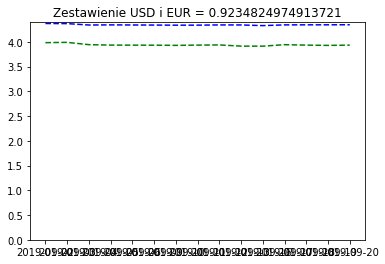

In [11]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

# Wprowadzanie danych wejściowych
waluta1 = input("Kod waluty1: (AAA)")
waluta2 = input("Kod waluty2: (AAA)")
data_od = input("Data początku: (rrrr-mm-dd)")
data_do = input("Data końca: (rrrr-mm-dd)")

# Funkcja wczytująca waluty z pliku .json
def fetch_currency(currency,beg,end):
    url = 'http://api.nbp.pl/api/exchangerates/rates/A/' + currency + "/" + data_od + "/" + data_do + "/"
    currency_req = requests.get(url)
    currency_data = currency_req.json()
    return currency_data['rates']

# Funkcja wczytująca waluty
rate1 = fetch_currency(waluta1,data_od,data_do)
rate2 = fetch_currency(waluta2,data_od,data_do)

waluta1_rates = pd.DataFrame.from_dict(rate1).head(15)
waluta1_rates.head()

# Tworzenie obiektów DataFrame i skrócenie ich do 15 wpisów
rate_dataframe1 = pd.DataFrame.from_dict(rate1).head(15)
rate_dataframe2 = pd.DataFrame.from_dict(rate2).head(15)

waluta2_rates = pd.DataFrame.from_dict(rate2).head(15)
waluta2_rates.head()

# Ustawienie indeksów na datę
plot_data1 = waluta1_rates.set_index(['effectiveDate'])['mid']
plot_data2 = waluta2_rates.set_index(['effectiveDate'])['mid']
plot_data1 = rate_dataframe1.set_index(['effectiveDate'])['mid']
plot_data2 = rate_dataframe2.set_index(['effectiveDate'])['mid']

# Funkcja licząca korelację dwóch kursów (punkt 4)
correlation = np.corrcoef (plot_data1, plot_data2)[0][1]

# Rysowanie wykresu z dwiema podanymi wcześniej walutami
plt.plot(plot_data1, 'g--', plot_data2,'b--')
plt.ylim(ymin=0)
plt.title('Zestawienie {} i {} = {}'.format(waluta1, waluta2, correlation))
